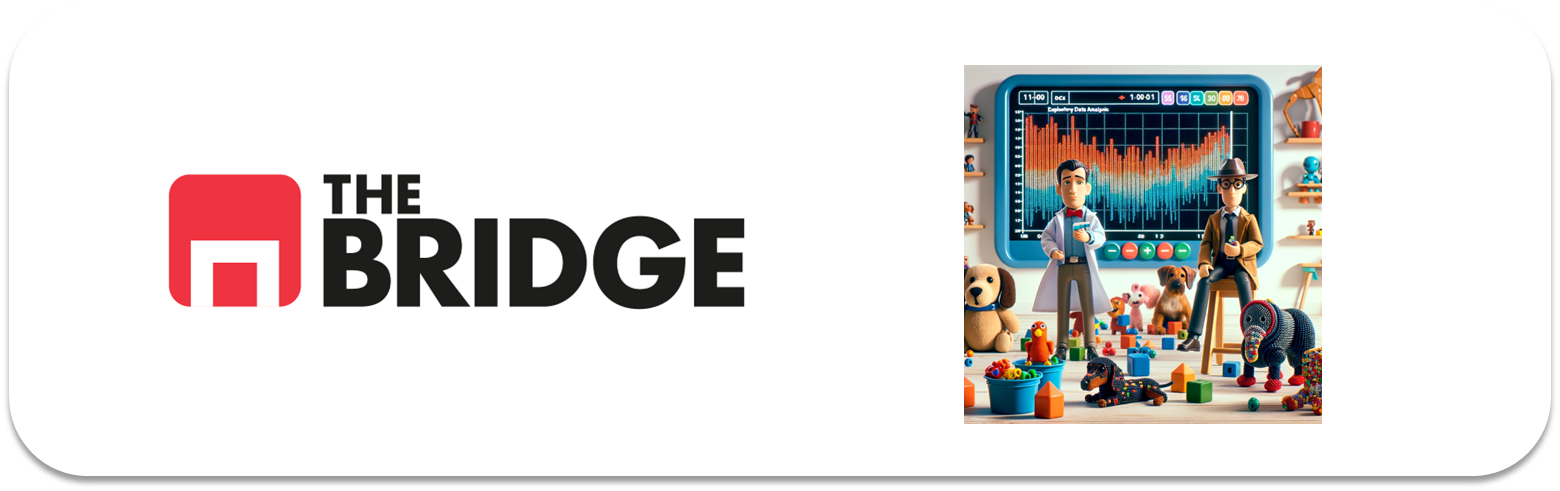

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
file_path = './data/titanic.csv'
titanic_df = pd.read_csv(file_path)

titanic_df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [3]:
columns_to_drop = ["deck", "survived", "pclass", "embarked"]
titanic_df_cleaned = titanic_df.drop(columns=columns_to_drop)

titanic_df_cleaned.head()

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [4]:
titanic_df_cleaned['family_members'] = titanic_df_cleaned['parch'] + titanic_df_cleaned['sibsp']

titanic_df_final = titanic_df_cleaned.drop(columns=["parch", "sibsp"])

titanic_df_final.head()


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [5]:
# Imputar la moda en los valores nulos de "embark_town"
mode_embark_town = titanic_df_final['embark_town'].mode()[0]
titanic_df_final['embark_town'].fillna(mode_embark_town, inplace=True)

# Mostrar las primeras filas para confirmar
titanic_df_final.head()


C:\Users\luisa\AppData\Local\Temp\ipykernel_22652\2776436607.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df_final['embark_town'].fillna(mode_embark_town, inplace=True)


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [6]:
# Imputar los valores nulos en "age" utilizando la media agrupada por "who"
titanic_df_final['age'] = titanic_df_final['age'].fillna(
    titanic_df_final.groupby('who')['age'].transform('mean')
)

# Mostrar las primeras filas para confirmar
titanic_df_final.head()


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

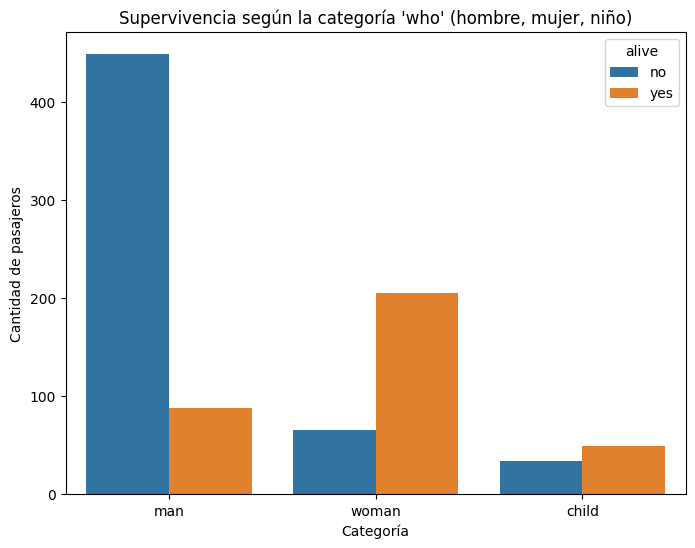

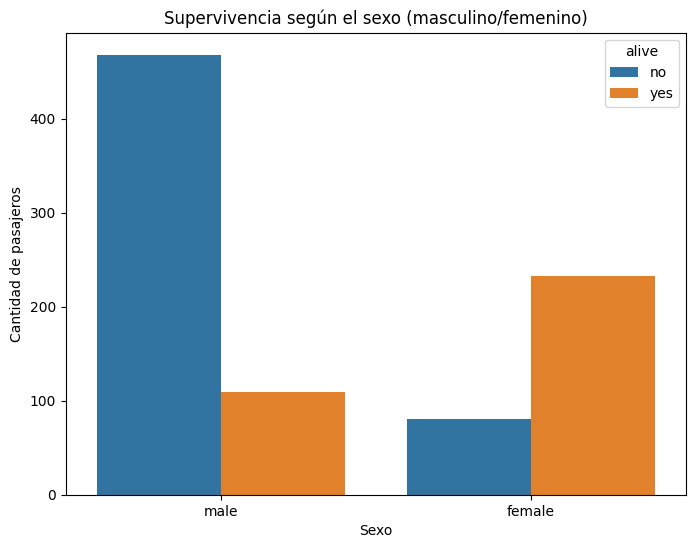

{'tabla_supervivencia': alive   no  yes
 who            
 child   34   49
 man    449   88
 woman   66  205,
 'p_valor': np.float64(2.2227620817798914e-62),
 'conclusion': "Existe relación estadísticamente significativa entre la categoría 'who' y la supervivencia"}

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Pregunta 1: Supervivencia por sexo y categoría (adulto/niño)
# Crear una tabla cruzada entre 'who' y 'alive'
survival_by_who = pd.crosstab(titanic_df_final['who'], titanic_df_final['alive'])

# Prueba de Chi-cuadrado para relación entre sexo/categoría y supervivencia
chi2, p, dof, expected = chi2_contingency(survival_by_who)

# Visualización de supervivencia por "who" (hombre, mujer, niño)
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_df_final, x='who', hue='alive')
plt.title("Supervivencia según la categoría 'who' (hombre, mujer, niño)")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de pasajeros")
plt.show()

# Visualización de supervivencia por sexo
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_df_final, x='sex', hue='alive')
plt.title("Supervivencia según el sexo (masculino/femenino)")
plt.xlabel("Sexo")
plt.ylabel("Cantidad de pasajeros")
plt.show()

# Resultados
{
    'tabla_supervivencia': survival_by_who,
    'p_valor': p,
    'conclusion': "Existe relación estadísticamente significativa entre la categoría 'who' y la supervivencia"
    if p < 0.05 else "No existe relación estadísticamente significativa entre la categoría 'who' y la supervivencia"
}


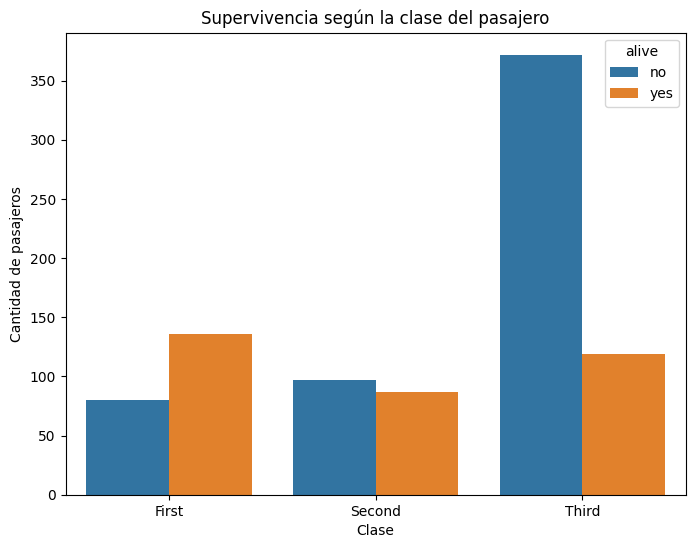

{'tabla_supervivencia_absoluta': alive    no  yes
 class           
 First    80  136
 Second   97   87
 Third   372  119,
 'tabla_supervivencia_relativa': alive         no       yes
 class                     
 First   0.370370  0.629630
 Second  0.527174  0.472826
 Third   0.757637  0.242363,
 'p_valor': np.float64(4.549251711298793e-23),
 'conclusion': 'Existe relación estadísticamente significativa entre la clase y la supervivencia'}

In [8]:
# Pregunta 2: Supervivencia por clase (en términos absolutos y relativos)

# Crear tabla cruzada entre "class" y "alive"
survival_by_class = pd.crosstab(titanic_df_final['class'], titanic_df_final['alive'])

# Calcular proporciones relativas
survival_by_class_relative = survival_by_class.div(survival_by_class.sum(axis=1), axis=0)

# Prueba Chi-cuadrado para relación entre clase y supervivencia
chi2_class, p_class, dof_class, expected_class = chi2_contingency(survival_by_class)

# Visualización de supervivencia por clase
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_df_final, x='class', hue='alive', order=['First', 'Second', 'Third'])
plt.title("Supervivencia según la clase del pasajero")
plt.xlabel("Clase")
plt.ylabel("Cantidad de pasajeros")
plt.show()

# Resultados
{
    'tabla_supervivencia_absoluta': survival_by_class,
    'tabla_supervivencia_relativa': survival_by_class_relative,
    'p_valor': p_class,
    'conclusion': "Existe relación estadísticamente significativa entre la clase y la supervivencia"
    if p_class < 0.05 else "No existe relación estadísticamente significativa entre la clase y la supervivencia"
}


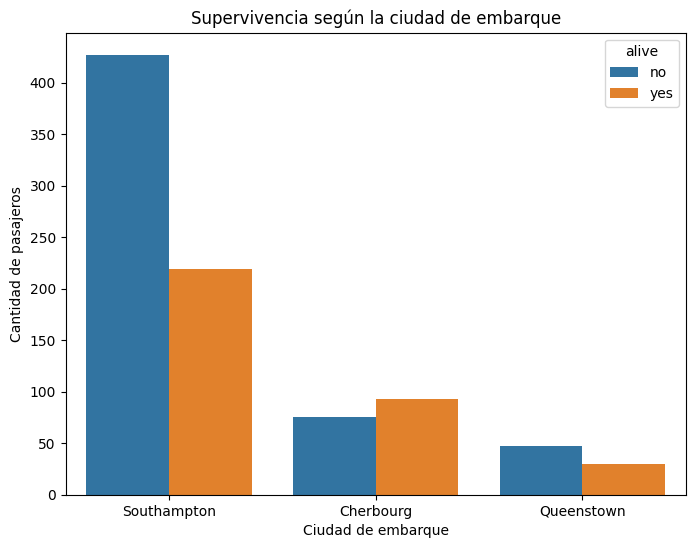

{'tabla_supervivencia_absoluta': alive         no  yes
 embark_town          
 Cherbourg     75   93
 Queenstown    47   30
 Southampton  427  219,
 'tabla_supervivencia_relativa': alive              no       yes
 embark_town                    
 Cherbourg    0.446429  0.553571
 Queenstown   0.610390  0.389610
 Southampton  0.660991  0.339009,
 'p_valor': np.float64(2.3008626481449577e-06),
 'conclusion': 'Existe relación estadísticamente significativa entre la ciudad de embarque y la supervivencia'}

In [9]:
# Pregunta 3: Supervivencia por ciudad de embarque

# Crear tabla cruzada entre "embark_town" y "alive"
survival_by_city = pd.crosstab(titanic_df_final['embark_town'], titanic_df_final['alive'])

# Calcular proporciones relativas
survival_by_city_relative = survival_by_city.div(survival_by_city.sum(axis=1), axis=0)

# Prueba Chi-cuadrado para relación entre ciudad de embarque y supervivencia
chi2_city, p_city, dof_city, expected_city = chi2_contingency(survival_by_city)

# Visualización de supervivencia por ciudad de embarque
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_df_final, x='embark_town', hue='alive')
plt.title("Supervivencia según la ciudad de embarque")
plt.xlabel("Ciudad de embarque")
plt.ylabel("Cantidad de pasajeros")
plt.show()

# Resultados
{
    'tabla_supervivencia_absoluta': survival_by_city,
    'tabla_supervivencia_relativa': survival_by_city_relative,
    'p_valor': p_city,
    'conclusion': "Existe relación estadísticamente significativa entre la ciudad de embarque y la supervivencia"
    if p_city < 0.05 else "No existe relación estadísticamente significativa entre la ciudad de embarque y la supervivencia"
}


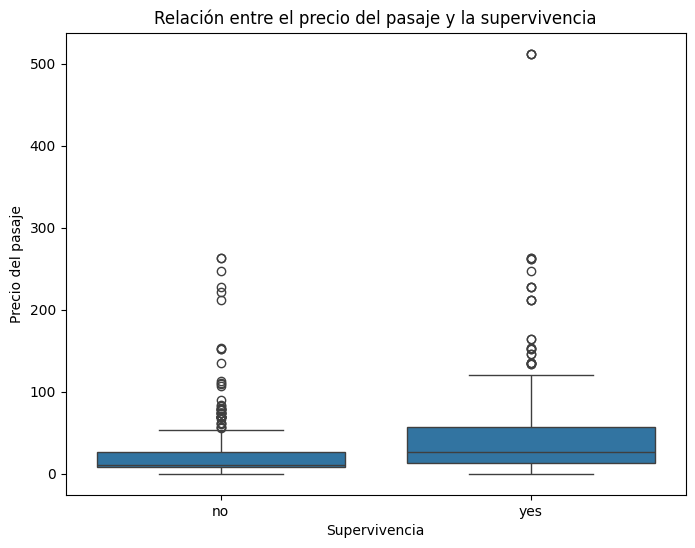

,count,mean,std,min,25%,50%,75%,max
alive,,,,,,,,
no,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
yes,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


In [10]:
# Pregunta 4: Relación entre el precio del pasaje (fare) y la supervivencia

# Visualización de la distribución de "fare" según supervivencia
plt.figure(figsize=(8, 6))
sns.boxplot(data=titanic_df_final, x='alive', y='fare')
plt.title("Relación entre el precio del pasaje y la supervivencia")
plt.xlabel("Supervivencia")
plt.ylabel("Precio del pasaje")
plt.show()

# Estadísticas descriptivas del precio del pasaje según supervivencia
fare_stats = titanic_df_final.groupby('alive')['fare'].describe()

fare_stats


In [11]:
# Pregunta 5: Pasajeros que no pagaron el billete y el que pagó más

# Filtrar pasajeros con fare = 0
no_fare_passengers = titanic_df_final[titanic_df_final['fare'] == 0]

# Identificar al pasajero que pagó más dinero
max_fare_passenger = titanic_df_final[titanic_df_final['fare'] == titanic_df_final['fare'].max()]

# Mostrar resultados
no_fare_info = {
    "num_pasajeros_sin_pago": len(no_fare_passengers),
    "detalle_sin_pago": no_fare_passengers[['sex', 'age', 'class', 'embark_town', 'alive']],
    "max_fare": max_fare_passenger[['sex', 'age', 'class', 'embark_town', 'fare', 'alive']]
}

no_fare_info


{'num_pasajeros_sin_pago': 15,
 'detalle_sin_pago':       sex        age   class  embark_town alive
 179  male  36.000000   Third  Southampton    no
 263  male  40.000000   First  Southampton    no
 271  male  25.000000   Third  Southampton   yes
 277  male  33.173123  Second  Southampton    no
 302  male  19.000000   Third  Southampton    no
 413  male  33.173123  Second  Southampton    no
 466  male  33.173123  Second  Southampton    no
 481  male  33.173123  Second  Southampton    no
 597  male  49.000000   Third  Southampton    no
 633  male  33.173123   First  Southampton    no
 674  male  33.173123  Second  Southampton    no
 732  male  33.173123  Second  Southampton    no
 806  male  39.000000   First  Southampton    no
 815  male  33.173123   First  Southampton    no
 822  male  38.000000   First  Southampton    no,
 'max_fare':         sex   age  class embark_town      fare alive
 258  female  35.0  First   Cherbourg  512.3292   yes
 679    male  36.0  First   Cherbourg  512.3

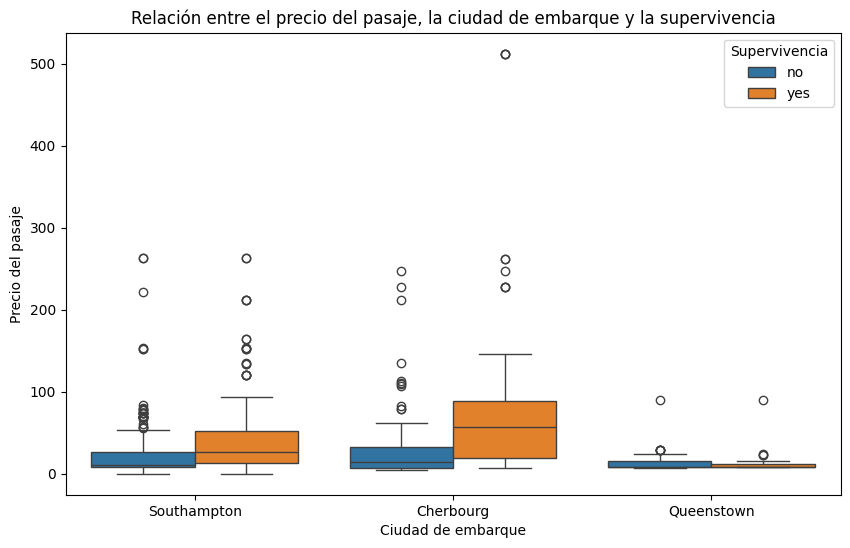

count       mean        std     min      25%       50%  \
embark_town alive                                                           
Cherbourg   no      75.0  35.443335  49.617218  4.0125   7.2292  14.45830   
            yes     93.0  79.720926  99.582717  7.2250  19.2583  56.92920   
Queenstown  no      47.0  13.335904  13.550636  6.7500   7.7500   7.75000   
            yes     30.0  13.182227  15.371167  7.7333   7.7500   7.80835   
Southampton no     427.0  20.743987  27.896824  0.0000   7.8958  10.50000   
            yes    219.0  39.916514  45.383008  0.0000  12.8250  26.00000   

                       75%       max  
embark_town alive                     
Cherbourg   no     32.6750  247.5208  
            yes    89.1042  512.3292  
Queenstown  no     15.5000   90.0000  
            yes    12.3500   90.0000  
Southampton no     26.0000  263.0000  
            yes    52.2771  263.0000

In [12]:
# Pregunta 6: Relación entre dinero pagado, ciudad de embarque y supervivencia

# Visualización conjunta del precio del pasaje, ciudad de embarque y supervivencia
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic_df_final, x='embark_town', y='fare', hue='alive')
plt.title("Relación entre el precio del pasaje, la ciudad de embarque y la supervivencia")
plt.xlabel("Ciudad de embarque")
plt.ylabel("Precio del pasaje")
plt.legend(title="Supervivencia")
plt.show()

# Estadísticas descriptivas del precio del pasaje agrupadas por ciudad de embarque y supervivencia
fare_stats_by_city = titanic_df_final.groupby(['embark_town', 'alive'])['fare'].describe()

fare_stats_by_city


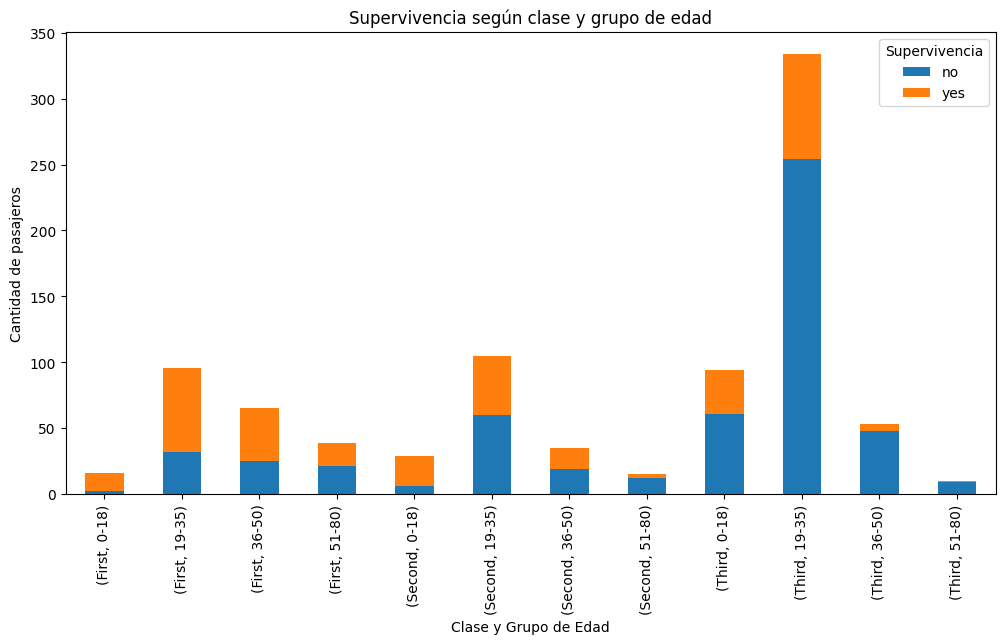

alive                   no       yes
class  age_group                    
First  0-18       0.125000  0.875000
       19-35      0.333333  0.666667
       36-50      0.384615  0.615385
       51-80      0.538462  0.461538
Second 0-18       0.206897  0.793103
       19-35      0.571429  0.428571
       36-50      0.542857  0.457143
       51-80      0.800000  0.200000
Third  0-18       0.648936  0.351064
       19-35      0.760479  0.239521
       36-50      0.905660  0.094340
       51-80      0.900000  0.100000

In [13]:
# Pregunta 7: Relación entre clase, edad y supervivencia

# Crear una nueva columna para agrupar edades en categorías
titanic_df_final['age_group'] = pd.cut(
    titanic_df_final['age'], bins=[0, 18, 35, 50, 80], labels=['0-18', '19-35', '36-50', '51-80']
)

# Tabla cruzada entre clase, edad y supervivencia
survival_by_class_age = pd.crosstab(
    [titanic_df_final['class'], titanic_df_final['age_group']], titanic_df_final['alive']
)

# Calcular proporciones relativas
survival_by_class_age_relative = survival_by_class_age.div(survival_by_class_age.sum(axis=1), axis=0)

# Visualización: Gráfico de barras apiladas
survival_by_class_age.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Supervivencia según clase y grupo de edad")
plt.xlabel("Clase y Grupo de Edad")
plt.ylabel("Cantidad de pasajeros")
plt.legend(title="Supervivencia")
plt.show()

# Resultados
survival_by_class_age_relative


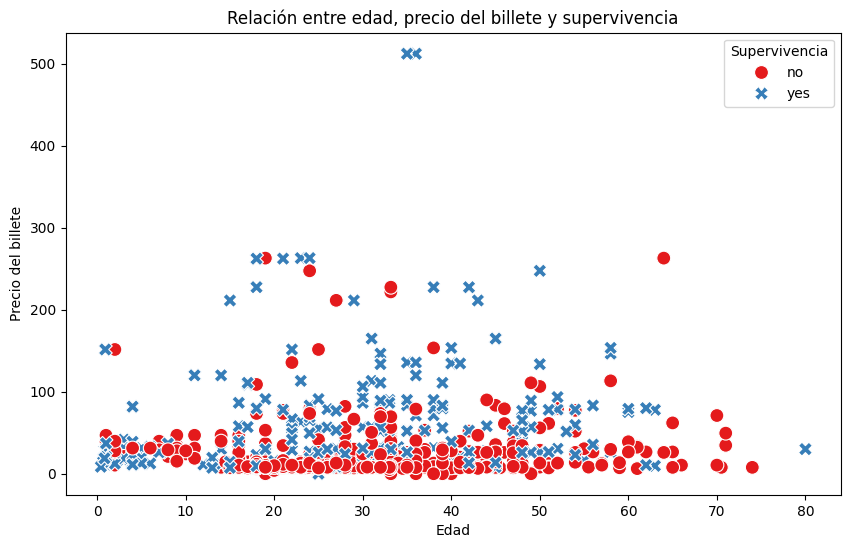

,age,fare,alive_binary
age,1.000000,0.080765,-0.082512
fare,0.080765,1.000000,0.257307
alive_binary,-0.082512,0.257307,1.000000


In [14]:
# Pregunta 8: Relación entre edad, precio del billete y supervivencia

# Visualización: Scatter plot de edad y precio del billete, coloreado por supervivencia
plt.figure(figsize=(10, 6))
sns.scatterplot(data=titanic_df_final, x='age', y='fare', hue='alive', style='alive', palette='Set1', s=100)
plt.title("Relación entre edad, precio del billete y supervivencia")
plt.xlabel("Edad")
plt.ylabel("Precio del billete")
plt.legend(title="Supervivencia")
plt.show()

# Calcular correlación entre edad, precio del billete y supervivencia
titanic_df_final['alive_binary'] = titanic_df_final['alive'].apply(lambda x: 1 if x == 'yes' else 0)
correlation_matrix = titanic_df_final[['age', 'fare', 'alive_binary']].corr()

correlation_matrix


## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.